# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 7/21/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 7/21/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,13393,38928341,34.4
Albania,206,2877800,7.2
Algeria,13973,43851043,31.9
Andorra,358,77265,463.3
Angola,1736,32866268,5.3
Antigua and Barbuda,10,97928,10.2
Argentina,205088,45195777,453.8
Armenia,2135,2963234,72.0
Australia,1523,25459700,6.0


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Summer Olympics 2020,55,0,inf
Fiji,12503,896444,1394.7
Seychelles,1237,98340,1257.9
Cyprus,13673,1207361,1132.5
United Kingdom,578752,67886004,852.5
Tunisia,91083,11818618,770.7
Botswana,17925,2351625,762.2
Cuba,86277,11326616,761.7
Netherlands,125390,17134873,731.8


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

7/17/21    3751253.0
7/18/21    3752236.0
7/19/21    3753220.0
7/20/21    3754846.0
7/21/21    3756497.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

7/8/21        NaN
7/9/21      885.0
7/10/21     809.0
7/11/21     568.0
7/12/21     553.0
7/13/21    1027.0
7/14/21    1623.0
7/15/21    1444.0
7/16/21    1565.0
7/17/21    1309.0
7/18/21     983.0
7/19/21     984.0
7/20/21    1626.0
7/21/21    1651.0
Name: Germany, dtype: float64

<AxesSubplot:>

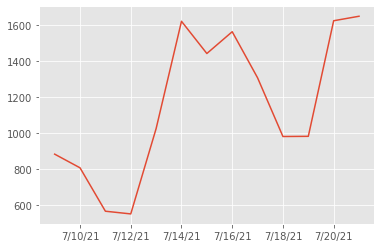

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

17.935417101689353